<a href="https://colab.research.google.com/github/silverjin01/2020-2-AI/blob/master/20190726_%ED%95%9C%EC%9D%80%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2020 인공지능 응용프로그램 기말고사-20190726한은진**

---



*   문제 개요와 목적
*   데이터 저장과 전처리
*   데이터 읽어 오기
*   데이터 수, 속성 수 등 소개
*   훈련과 테스트 데이터 나누기
*   정규화 등 전처리
*   딥러닝 모델
*   입력, 중간(은닉), 출력 층, 패러미터 수
*   모델 종류(ANN, CNN 등)
*   옵티마이저, 손실함수
*   Early Stopping
*   Callback 함수
*   모델 요약(summary)
*   데이터와 훈련과정, 예측 결과의 시각화
*   정확도와 손실 그래프
*   예측 결과


---







**1. 회귀문제: 스스로가 문제를 정하거나 유명한 문제 하나로 선정해 해결**


> [주제] y = 3x + 4



**회귀란?**

> 기본적인 데이터 분석 방법.

> 가격이나 확률처럼 연속된 실수값을 정확히 예측하는 것을 목적으로 가진 방법





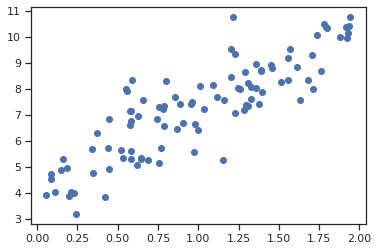

In [38]:
import tensorflow as tf # 텐서플로를 사용하기 위한 모듈
import numpy as np # 연산을 위한 모듈
import matplotlib.pyplot as plt #t시각화를 위한 모듈

x = 2 * np.random.rand(100, 1) #0부터 2까지의 랜덤한 값을 선언
y = 4 + 3 * x + np.random.randn(100, 1) #y=3x+4 경향에 가깝도록 y=3x=4=random으로 선언

plt.plot(x, y, 'bo') # x와 y를 파란색 원형으로 시각화
plt.show() # 보여줌

a: [3.094941] b: [3.95974903]


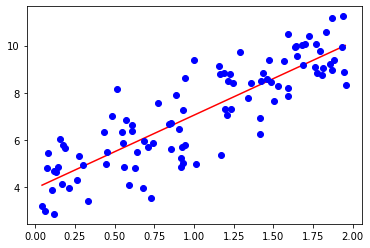

In [15]:
#간단한게 numpy를 사용한 선형 회귀
x_mean = sum(x) / len(x) # x의 평균
y_mean = sum(y) / len(y) # y의 평균

a = sum([(x_ - x_mean) * (y_ - y_mean) for x_, y_ in list(zip(x, y))]) 
a /= sum([(x_ - x_mean) ** 2 for x_ in x]) 
b = y_mean - a * x_mean 
print('a:', a, 'b:', b) 

x_pred = np.arange(min(x), max(x), 0.01) # x값들을 numpy 배열로 바꿈
y_pred = a * x_pred + b # 최소제곱법을 사용하여 a와 b를 사용하여 계산한 값

plt.plot(x_pred, y_pred, 'r-') # x_pred, y_pred를 빨간 선으로 시각화
plt.plot(x,y,'bo') # x, y값을 파란색 원형으로 시각화
plt.show() # 보여줌

#결과 : a가 3에 가깝고 b가 4에 가깝게 계산됨

In [39]:
#텐서플로를 사용한 선형회귀
import random 
#가중치와 편향을 랜덤 값으로 초기화
w = tf.Variable(random.random()) # 가중치
b = tf.Variable(random.random()) # 편향

In [40]:
#잔차를 구하는 함수
def residue(): 
  y_pred = w * x + b # 예측값
  re= tf.reduce_mean((y - y_pred) ** 2) # 예측 값과 실제값의 차이를 제곱한 값의 합의 평균
  return re # 평균값 반환

In [41]:
# 손실을 최소화하는 최적화 함수으로는 학습률 0.07을 사용하여 Adam을 사용
# Adam은 SGD와 함께 주로 사용되는 함수로 좋은 성능을 보여줌(가장 낮은 손실을 기록)
# 여기서 합습률은 0.1 ~ 0.0001 사이 값을 주로 사용
optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000): # 1000번 반복
   optimizer.minimize(residue, var_list=[w,b]) #var_list로 받은 변수 리스트를 residue함수가 최소가 되도록 학습시킬 변수를 받음
   
   if i % 100 == 99: # 범위값(i)의 나머지가 99일 때
     print(i, 'w:', w.numpy(), 'b:', b.numpy(), 'loss:', residue().numpy()) # 범위값, 가중치, 편향, 손실도 출력

99 w: 3.299344 b: 4.0173144 loss: 0.8794762
199 w: 3.1777253 b: 4.091556 loss: 0.8645366
299 w: 3.1045816 b: 4.174385 loss: 0.859212
399 w: 3.0586095 b: 4.226598 loss: 0.85747415
499 w: 3.0344503 b: 4.2540355 loss: 0.85706085
599 w: 3.0236197 b: 4.266336 loss: 0.85698724
699 w: 3.019442 b: 4.2710805 loss: 0.8569773
799 w: 3.0180511 b: 4.2726603 loss: 0.85697633
899 w: 3.0176523 b: 4.2731137 loss: 0.8569764
999 w: 3.017556 b: 4.2732224 loss: 0.85697633


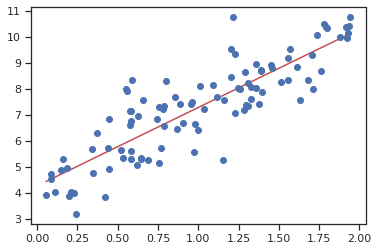

In [42]:
x_pred = np.arange(min(x), max(x), 0.01) # x예측값은 x의 최소값을 시작으로 x의 최대값을 끝, 0.01 간격으로 건너뜀
y_pred = w * x_pred + b # 가중치 + x_pred + 편향

plt.plot(x_pred, y_pred, 'r-') # x_pred, y_pred 값을 빨간색 선으로 시각화
plt.plot(x, y, 'bo') # x, y 값을 파란색 원형으로 시각화
plt.show() # 보여줌

# 결과 : numpy로 계산한 a, b와 텐서플로우로 계산한 w, b가 완전히 일치하지는 않지만 유사함을 알 수 있음

In [43]:
# sklearn 모듈 : LinearRegression을 위한 자체적인 모델을 제공하며, fit()을 통해 데이터를 입력시켜 줌
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression() # 객체 생성
lin_reg.fit(x, y) # 데이터 입력
print(lin_reg.intercept_, lin_reg.coef_)

# coef_ : 형태의 배열 (n_features,) 또는 (n_targets, n_features)
#         선형 회귀 문제에 대한 추정 계수입니다. 맞춤 (y 2D) 중에 여러 대상이 전달되는 경우 이것은 모양의 2D 배열 (n_targets, n_features)이고, 하나의 대상 만 전달되는 경우 길이 n_features의 1D 배열입니다.

# fit_intercept : bool, 기본값 = True
# 이 모델에 대한 절편을 계산할지 여부입니다. False로 설정하면 계산에 인터셉트가 사용되지 않습니다 (예 : 데이터가 중앙에 배치 될 것으로 예상 됨).

# 결과 : numpy 계산과 일치하고 텐서플로의 계산과는 유사하게 결과를 보여줌

[4.27325343] [[3.01752905]]


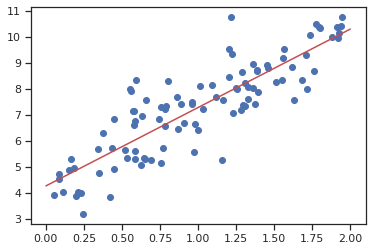

In [44]:
x_pred = np.array([[0], [2]]) 
y_pred = lin_reg.predict(x_pred) 

plt.plot(x, y, 'bo') 
plt.plot(x_pred, y_pred, 'r-') 
plt.show()

In [45]:
# 딥러닝 네트워크를 이용한 회귀

model = tf.keras.Sequential([ # 모델 생성
      tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)), # 6개의 중간층, 할성화함수는 하이퍼볼릭 탄젠트
      tf.keras.layers.Dense(units=1) # 1개의 출력층                    
])
# 훈련에 사용할 활성화함수와 손실함수를 선택
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
# 모델 요약 표시
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 딥러닝 네트워크 학습
model.fit(x, y, epochs=10)
#model.fit(x_pred, y_pred, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 30.3405
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 1.6208
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 1.1702
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.9863
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 1.1580
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 1.1842
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9422
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 2.9534
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 2.5795
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 1.3177


In [47]:
# 딥러닝 네트워크 예측(x값을 입력했을 때의 결과값 : y값 예측하기)
model.predict(x)

array([[9.263662 ],
       [9.609662 ],
       [7.362401 ],
       [7.4901247],
       [9.349362 ],
       [9.242114 ],
       [8.437815 ],
       [9.472082 ],
       [9.339317 ],
       [8.66353  ],
       [8.737269 ],
       [7.430727 ],
       [5.0503654],
       [8.623125 ],
       [7.8432474],
       [9.728675 ],
       [9.663991 ],
       [7.4625244],
       [7.634823 ],
       [9.083131 ],
       [9.222458 ],
       [9.325774 ],
       [7.323121 ],
       [8.4869   ],
       [9.121962 ],
       [9.153501 ],
       [6.7471285],
       [9.510501 ],
       [8.8979845],
       [8.780876 ],
       [9.008585 ],
       [9.304879 ],
       [8.364276 ],
       [7.4560814],
       [5.5626144],
       [8.157264 ],
       [8.706175 ],
       [7.4478216],
       [8.941728 ],
       [9.105513 ],
       [4.916771 ],
       [6.832391 ],
       [9.573677 ],
       [8.069046 ],
       [9.760044 ],
       [7.6884727],
       [9.211984 ],
       [9.207425 ],
       [9.750427 ],
       [9.647329 ],


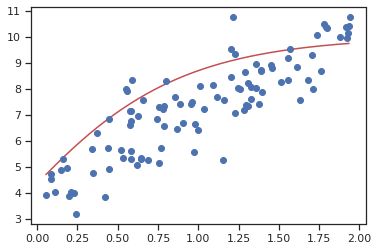

In [48]:
line_x = np.arange(min(x), max(x), 0.01) # x예측값은 x의 최소값을 시작으로 x의 최대값을 끝, 0.01 간격으로 건너뜀
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-') # x_pred, y_pred 값을 빨간색 선으로 시각화
plt.plot(x, y, 'bo') # x, y 값을 파란색 원형으로 시각화
plt.show() # 보여줌


**2. 분류문제**


> Iris 붓꽃 분류 



**분류란?**


> 데이터가 어느 범주에 해당하는 판단하는 문제로서 유사한 것들을 같은 범주로 묶으면 주변에서 일어나는 일을 빠르게 판단하는 데 도움이 됨




 **Iris 붓꽃이란?**

> Iris 붓꽃을 분류하는데 꽃받침과 꽃잎의 길이와 폭을 가지고 세 개의 종(Versicolor, Virginica, Setosa)을 분류하는 예제
> 세 개의 종을 분류하기 위해서는 네 종류의 데이터(꽃받침과 꽃잎의 가로 세로 길이)를 이용해서 분류를 한다



In [ ]:
# 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.1.6
except Exception:
    pass
import tensorflow as tf    

In [23]:
# 텐서플로의 버전 확인
import tensorflow as tf 
tf.__version__

'2.4.0'

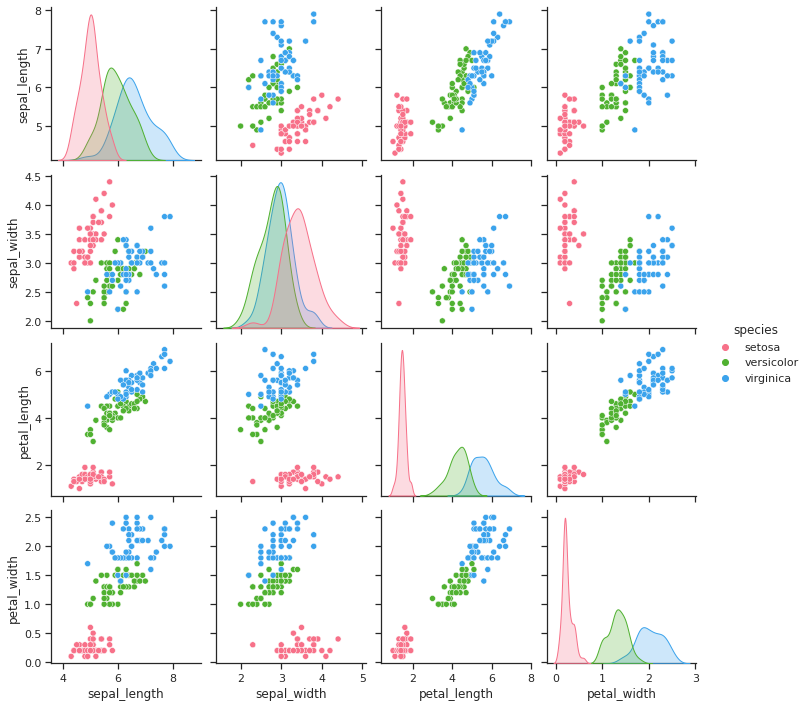

In [51]:
# 필요한 모듈 가져오기
%matplotlib inline
import seaborn as sns # seaborn이 제공하는 iris 데이터 가져오기
import pandas as pd #dataframe의 형태로 데이터베이스 테이블과 유사하게 사용되기 위해 
import numpy as np # 연산을 위해

# iris 데이터셋 가져오기
sns.set(style="ticks", color_codes=True) # 눈금자 없는 스타일, 
iris = sns.load_dataset("iris") # 데이터 불러오기
g = sns.pairplot(iris, hue="species", palette="husl") # pairplot : 분포형그래프(쌍관계 그래프를 그림)

In [52]:
iris.info() # 데이터의 특징 보기
# 결과값 : 150개 데이터와 4개의 특성, 종의 이름

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
iris['species'].unique() # 종의 특성만 보기
# 결과값 : 앞에 설명했던 세 개의 종이 나타남

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [54]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:,0:4].values # iloc() : 행번호로 선택하는 방법
y = iris.iloc[:,4].values

encoder =  LabelEncoder() # 문자열로된 이름에 번호를 붙이고
y1 = encoder.fit_transform(y) # 원 핫 인코딩 방식으로 펼쳐줌
Y = pd.get_dummies(y1).values # 바뀐 값 대입
Y # 출력

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [55]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape # 출력

((120, 4), (30, 4), (120, 3), (30, 3))

In [56]:
# 모델 만들기(버전 예민해서 잘 사용해야함)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 층을 차례대로 쌓아 tf.keras.Sequential 모델 생성
model = Sequential()

# 데이터 구조
model.add(Dense(64,input_shape=(4,),activation='relu')) # 입력층
model.add(Dense(64,activation='relu')) # 중간층
model.add(Dense(3,activation='softmax')) # 출력층

# 훈련에 사용할 활성화함수와 손실함수 출력정보 선택
model.compile(loss='categorical_crossentropy', # 손실함수: 사용되는 타켓들은 범주 형식을 따라야 함
              optimizer='Adam', # 활성화 함수: 
              metrics=['accuracy']) # 출력정보: 

# 모델 요약 표시
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [57]:
# 모델을 후련 데이터로 총 100번 훈련
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 65ms/step - loss: 1.0164 - accuracy: 0.5542 - val_loss: 1.0720 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.9058 - accuracy: 0.5502 - val_loss: 0.9615 - val_accuracy: 0.5667
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8320 - accuracy: 0.6821 - val_loss: 0.8138 - val_accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7499 - accuracy: 0.8002 - val_loss: 0.7463 - val_accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6922 - accuracy: 0.7856 - val_loss: 0.7152 - val_accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6292 - accuracy: 0.7269 - val_loss: 0.6715 - val_accuracy: 0.5667
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5808 - accuracy: 0.7258 - val_loss: 0.6272 - val_accuracy: 0.6000
Epoch 8/100
4/4 [===

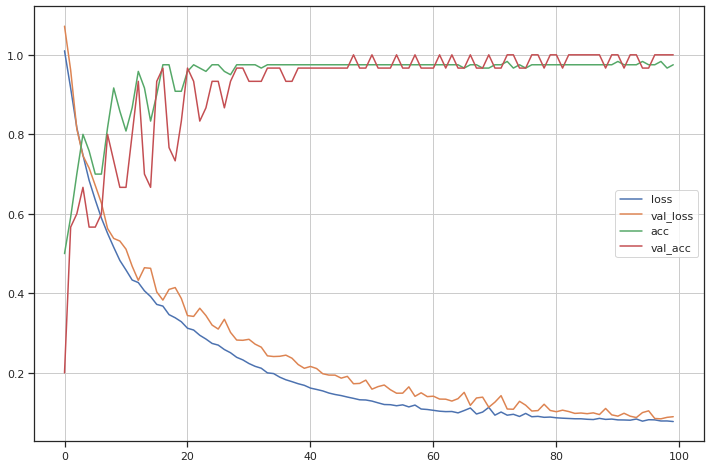

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8)) # 표의 사이즈
plt.plot(hist.history['loss']) # 훈련 손실값을 나타냄
plt.plot(hist.history['val_loss']) # 검증 손실값을 나타냄
#plt.plot(hist.history['acc']) # 버전업 하면서 바뀜
#plt.plot(hist.history['val_acc']) # 버전업 하면서 바뀜
plt.plot(hist.history['accuracy']) # 훈련 정확도를 나타냄
plt.plot(hist.history['val_accuracy']) # 검증 정확도를 나타냄
plt.legend(['loss','val_loss', 'acc','val_acc']) # 항목 구현
plt.grid() # 그리드 형식으로
plt.show() # 보여줌

In [59]:
# 테스트 데이터를 평가
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))
# 결과 : 100% 정확도

1/1 [==============================] - 0s 15ms/step - loss: 0.0898 - accuracy: 1.0000
Accuracy = 1.00


In [60]:
# 예측값과 테스트값의 일치성
# recall은 실제 데이터 중 몇 개를 예측에 성공했는지
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [61]:
# 임의 데이터 값을 넣어서 어떻게 판단하는지 
test_set = np.array([[5, 2.9, 1, 0.2]])
print("Predicted target name: {}".format(
    iris['species'].unique()[model.predict_classes(test_set)]))

Predicted target name: ['setosa']


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [62]:
# iris 특성의 종 중 하나다 versicolor일 경우의 데이터를 뽑아냄
iris.query("species == 'versicolor'")

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [63]:
test_set = np.array([[7, 3.0, 5, 1.4]])
print("Predicted target name: {}".format(
    iris['species'].unique()[model.predict_classes(test_set)]))

Predicted target name: ['versicolor']


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**3. CNN**


>주제 : 1. CIFAR-10 분류(반드시 CNN 사용해 딥러닝 처리)



CNN이란 ? 

> CNN은 생명체의 시각 처리 방식을 모방하기 위해 convolution이라는 연산을 인공신경망에 도입함으로써 이미지 처리 분야에서 기존의 머신 러닝 알고리즘들을 압도하였다. 2016년에 공개된 알파고에서도 CNN 기반의 딥 러닝 알고리즘이 이용되었다. CNN에서는 입력 및 출력 부분에서 뉴런들이 느슨하게 연결되어 있다. 이러한 구조적 특징에 의해 CNN은 DFN이나 RNN에 비해 학습해야하는 가중치의 수가 적으며, 이 덕분에 학습 및 예측이 빠르다는 장점이 있다. 최근에는 CNN의 강력한 예측 성능과 계산상의 효율성을 바탕으로 이미지뿐만 아니라 시계열 데이터에도 CNN을 적용하는 연구가 활발히 진행되고 있다.



In [8]:
# for cpu and gpu
! pip install --upgrade tensorflow # 텐서플로 버전 업그레이드

  Using cached https://files.pythonhosted.org/packages/7a/ce/e76c4e3d2c245f4f20eff1bf9cbcc602109448142881e1f946ba2d7327bb/tensorflow-2.4.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/02/83/179c8f76e5716030cc3ee9433721161cfcc1d854e9ba20c9205180bb100a/tensorboard-2.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/7e/622d9849abf3afb81e482ffc170758742e392ee129ce1540611199a59237/tensorflow_estimator-2.4.0-py2.py3-none-any.whl
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:

In [1]:
# 텐서플로 2.0 버전 선택(안해도됨!!!!)
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf    

In [2]:
# 텐서플로의 버전 확인
import tensorflow as tf 
tf.__version__

'2.4.0'

In [3]:
# 케라스 데이터셋에 있는 cifar10f를 다운로드
from keras.datasets import cifar10 

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
# 가져온 데이터셋을 살펴봄

# 32X32 크기의 RGB 패널로 구성된 이미지가 각각 학습용 5000개, 테스트용 1000개가 들어있음
print(train_images.shape, train_labels.shape) # (50000, 32, 32, 3) (50000, 1) 
print(test_images.shape, test_labels.shape) # (10000, 32, 32, 3) (10000, 1)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


[6], [9], [9], [4], [1], 

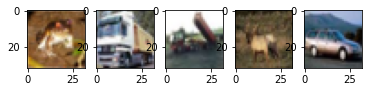

In [5]:
# 데이터 시각화를 위해 matplotlib를 import 해줌
import matplotlib.pyplot as plt 
%matplotlib inline 

# 학습용 데이터를 5번 이미지와 그에 대한 예측값을 출력
for i in range(5): 
  plt.subplot(2, 5, i + 1) # subplot(행, 열, 숫자 이미지 출력할 순서) 함수
  plt.imshow(train_images[i]) # 학습용의 이미지를 보여줌
  print(train_labels[i], end=", ") # 학습용의 숫자로 된 라벨을 출력
plt.show()

In [6]:
# RGB 채널을 각각 0~255까지의 값을 갖고 있음
from keras.utils import to_categorical 

train_images = train_images.astype('float32') # 타입을 실수형으로 바꿔줌 # 255.0 
test_images = test_images.astype('float32') # 타입을 실수형으로 바꿔줌 # 255.0 

# 라벨을 범주형으로 인코딩하기 위함
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10)
print(train_labels, test_images)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] [[[[158. 112.  49.]
   [159. 111.  47.]
   [165. 116.  51.]
   ...
   [137.  95.  36.]
   [126.  91.  36.]
   [116.  85.  33.]]

  [[152. 112.  51.]
   [151. 110.  40.]
   [159. 114.  45.]
   ...
   [136.  95.  31.]
   [125.  91.  32.]
   [119.  88.  34.]]

  [[151. 110.  47.]
   [151. 109.  33.]
   [158. 111.  36.]
   ...
   [139.  98.  34.]
   [130.  95.  34.]
   [120.  89.  33.]]

  ...

  [[ 68. 124. 177.]
   [ 42. 100. 148.]
   [ 31.  88. 137.]
   ...
   [ 38.  97. 146.]
   [ 13.  64. 108.]
   [ 40.  85. 127.]]

  [[ 61. 116. 168.]
   [ 49. 102. 148.]
   [ 35.  85. 132.]
   ...
   [ 26.  82. 130.]
   [ 29.  82. 126.]
   [ 20.  64. 107.]]

  [[ 54. 107. 160.]
   [ 56. 105. 149.]
   [ 45.  89. 132.]
   ...
   [ 24.  77. 124.]
   [ 34.  84. 129.]
   [ 21.  67. 110.]]]


 [[[235. 235. 235.]
   [231. 231. 231.]
   [232. 232. 232.]
 

In [7]:
# 컨볼루션 신경망 모델 정의
# 컨볼루션 신경망? 풀링 레이어 또는 드롭아웃 없이 정의된 모델을 말함
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense 

model = tf.keras.Sequential() 
# 데이터셋의 데이터 시퀀스를 학습하기 위한 모델 구성 객체

# 총 3개의 블럭을 층층이 쌓아올리고, 각 블럭 내부에서도 층층히 쌓아올려 모델을 생성

# 필터로 특징을 뽑아주는 컨볼로션 레이어(케라스에서 제공) Conv2D
# Conv2D는 영상 인식에 주로 사용되며 필터가 탑재
# Conv2D(컨볼루션 필터의 수, 컨볼루션 커널의(행, 열), 활성화 함수, 경계 처리 방법, 입력 형태(샘플수, 채널 수, 행, (열)))
# 활성화 함수는 은닉층으로, 경계처리 방법은 출력 이미지 사이즈가 입력 이미지 사이즈와 동일, 샘플 수 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
# 최대 폴링 레이어(사소한 픽셀의 값을 무시하고, 가장 큰 특징을 나타내는 값을 기록하는 방식)
model.add(MaxPool2D(pool_size=(2, 2))) # pool_size : 연산 범위(해당 번위 내의 가장 큰 수만을 가져옴)
model.add(Dropout(0.25)) 

# 필터의 수는 64, 컨볼루션 커널은 3행 3열, 활성화 함수는 은닉층으로, 경계 처리 방법은 출력*입력 이미지 사이즈 동일하게
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPool2D(pool_size=(2, 2)))  # pool_size : 연산 범위(해당 번위 내의 가장 큰 수만을 가져옴)
model.add(Dropout(0.25)) # Dropout: 과적합 방지, 0.25비율로 학습 과정에서 무작위로 뉴런의 집합을 제거

# CNN에서 컨볼루션 레이어와 폴링 레이어를 반복적으로 거치면 주요 특징 추출
# 추출된 주요 특징은 2차원 데이터 이루어져 있지만, Dense와 같이 분류를 위한 학습 레이어에서는 1차원 데이터로 바꿔 학습
model.add(Flatten()) # 2차원 데이터를 1차원 데이터로 바꾸는 역할의 레이어 
model.add(Dense(512, activation='relu')) # 512개의 노드와 확성화 함수는 인닉 층으로 학습
model.add(Dropout(0.5)) # 0.5비율로 학습 과정에서 무작위로 뉴런의 집합을 제거
model.add(Dense(10, activation='softmax')) # 10개의 노드와 활성화 함수는 확률 값을 이용해 다양한 클래스를 분류하는 함수로 학습

In [8]:
# 컴파일 단계
from keras.optimizers import Adam 
# 손실함수로는 분류에 적합한 categorical_crossentropy 사용, 최적화 함수로는 학습률 0.001인 Adam 함수를 사용, 평가지표로는 정확도 사용
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [9]:
# fit 함수로 학습을 시키는 단계
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 237s 672ms/step - loss: 4.9224 - acc: 0.2323 - val_loss: 1.4825 - val_acc: 0.4746
Epoch 2/20
352/352 [==============================] - 240s 681ms/step - loss: 1.5089 - acc: 0.4578 - val_loss: 1.2411 - val_acc: 0.5640
Epoch 3/20
352/352 [==============================] - 238s 677ms/step - loss: 1.3333 - acc: 0.5238 - val_loss: 1.1076 - val_acc: 0.6160
Epoch 4/20
352/352 [==============================] - 237s 674ms/step - loss: 1.2015 - acc: 0.5768 - val_loss: 1.0152 - val_acc: 0.6502
Epoch 5/20
352/352 [==============================] - 239s 679ms/step - loss: 1.0973 - acc: 0.6137 - val_loss: 0.9952 - val_acc: 0.6514
Epoch 6/20
352/352 [==============================] - 237s 675ms/step - loss: 1.0379 - acc: 0.6355 - val_loss: 0.9099 - val_acc: 0.6818
Epoch 7/20
352/352 [==============================] - 239s 679ms/step - loss: 0.9862 - acc: 0.6539 - val_loss: 0.8655 - val_acc: 0.6978
Epoch 8/20
352/352 [============================

In [11]:
# 필요한 모듈 가져오기
from keras.models import load_model 

model.save('CNN_CIFAR10.h5') 
model = load_model('CNN_CIFAR10.h5')

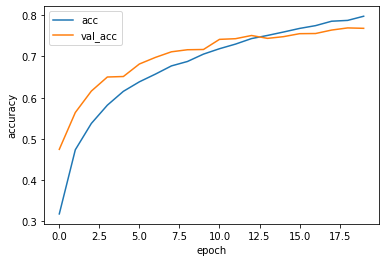

In [12]:
plt.plot(history.history['acc'], label='acc') # 훈련 정확도를 나타냄
plt.plot(history.history['val_acc'], label='val_acc') # 검증 정확도를 나타냄
plt.ylabel('accuracy') # y축 라벨 만듦
plt.xlabel('epoch') # x축 라벨 만듦

plt.legend(loc='best') # 목록
plt.show() # 보여줌

In [13]:
# 테스트 데이터로 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 14s 43ms/step - loss: 0.7183 - acc: 0.7568


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], 

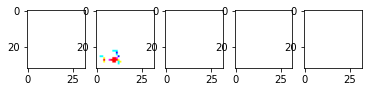

In [22]:
# 테스트 데이터를 5번 이미지와 그에 대한 예측값을 출력
for i in range(5): 
  plt.subplot(2, 5, i + 1) # subplot(행, 열, 숫자 이미지 출력할 순서) 함수
  plt.imshow(test_images[i]) # 테스트의 이미지를 보여줌
  print(test_labels[i], end=", ") # 테스트의 숫자로 된 라벨을 출력
plt.show()